<a href="https://colab.research.google.com/github/Yamini-K1810/Arecanut-Disease-Detection-using-CNN/blob/main/ArecanutFruits_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow tensorflow-gpu keras tensorboard tf-keras -y


Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: tensorboard 2.8.0
Uninstalling tensorboard-2.8.0:
  Successfully uninstalled tensorboard-2.8.0


In [ ]:
!pip uninstall protobuf -y

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3


In [ ]:
!pip install protobuf==3.20.*

  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-hub 0.16.1 requires tf-keras>=2.14.1, which is not installed.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
pandas-gbq 0.26.1 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.


In [ ]:
!pip install tensorflow==2.8.0


  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)
Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/ArecanutFruit.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/ArecanutFruit.zip
replace ArecanutFruit/Healthy_Nut/healthy_nut (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
train_data_generator = datagen.flow_from_directory(directory='/content/ArecanutFruit',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                  )

Found 44 images belonging to 2 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory='/content/ArecanutFruit',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                  )

Found 10 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 30,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))
model.save('arecanut_fruit_vgg19.h5')

Epoch 1/30


<ipython-input-74-b9cdb77b9859>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


3/3 [==============================] - 1s 222ms/step - loss: 0.0466 - accuracy: 0.9545 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 0s 158ms/step - loss: 0.0550 - accuracy: 0.9318 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 0s 140ms/step - loss: 0.0442 - accuracy: 0.9773 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 147ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 126ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 145ms/step - loss: 0.0423 - accuracy: 0.9773 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 132ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 8/30
3/3 [===============

In [ ]:
history.history

{'loss': [0.0465855598449707,
  0.05502835288643837,
  0.04418845474720001,
  0.033201511949300766,
  0.03784860670566559,
  0.04231930151581764,
  0.02240978367626667,
  0.02713143825531006,
  0.03847506642341614,
  0.023787658661603928,
  0.012189418077468872,
  0.021662713959813118,
  0.021001484245061874,
  0.03406992927193642,
  0.04102843627333641,
  0.07832265645265579,
  0.051571860909461975,
  0.036374181509017944,
  0.05083613097667694,
  0.03782714530825615,
  0.01161415595561266,
  0.012099548242986202,
  0.022261008620262146,
  0.020823197439312935,
  0.005797550082206726,
  0.020396150648593903,
  0.03310832008719444,
  0.019517572596669197,
  0.04813631996512413,
  0.0514904148876667],
 'accuracy': [0.9545454382896423,
  0.9318181872367859,
  0.9772727489471436,
  1.0,
  1.0,
  0.9772727489471436,
  1.0,
  0.9772727489471436,
  0.9772727489471436,
  1.0,
  1.0,
  1.0,
  0.9772727489471436,
  0.9772727489471436,
  0.9772727489471436,
  0.9318181872367859,
  0.954545438289

In [ ]:
predict = model.predict_generator(validation_data_generator, steps=len(validation_data_generator))

<ipython-input-76-547e2b9c4fe8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(validation_data_generator, steps=len(validation_data_generator))


In [ ]:
for i in predict:
  print(i)

[3.1185616e-06]
[8.452008e-06]
[0.0168629]
[1.2288083e-08]
[0.01148197]
[1.0503797e-05]
[0.002738]
[0.01634079]
[5.6030026e-06]
[2.6321334e-07]


In [ ]:
rounded_predict = np.rint(predict)
print(rounded_predict)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


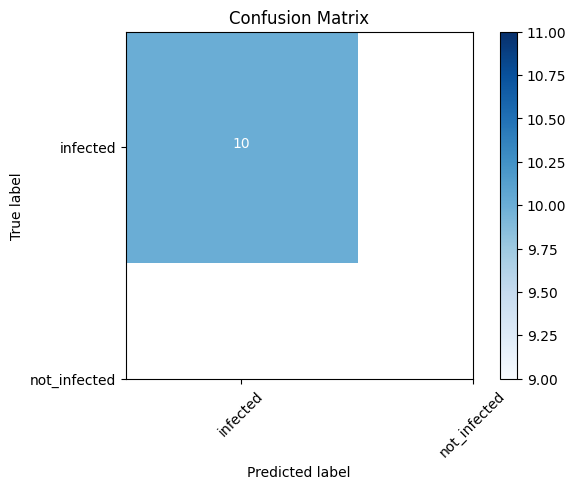

In [ ]:
cm = confusion_matrix(y_true=validation_data_generator.labels, y_pred=rounded_predict)
cm_plot_labels = ['infected','not_infected']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


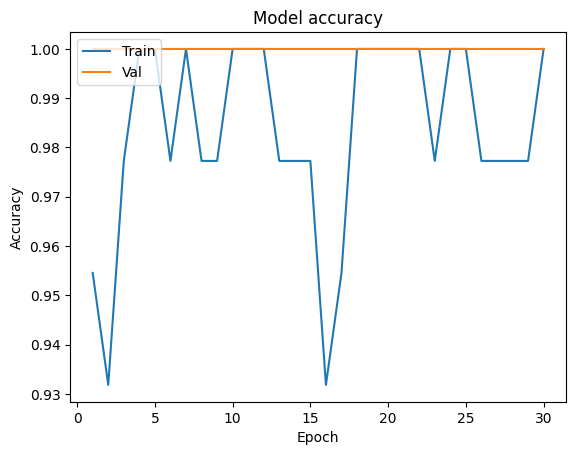

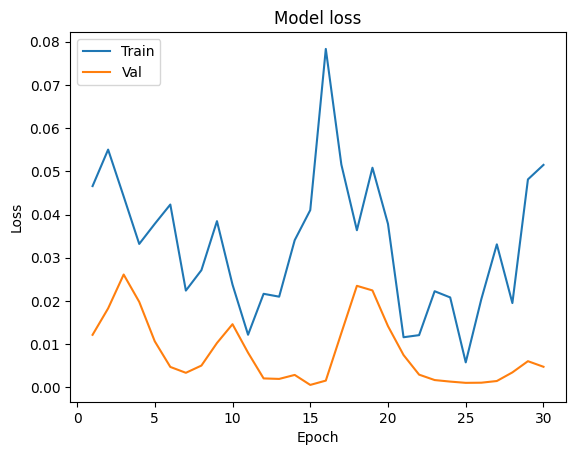

In [ ]:
plot_learningCurve(history, 30)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [ ]:
recall_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [ ]:
model = load_model('arecanut_fruit_vgg19.h5')

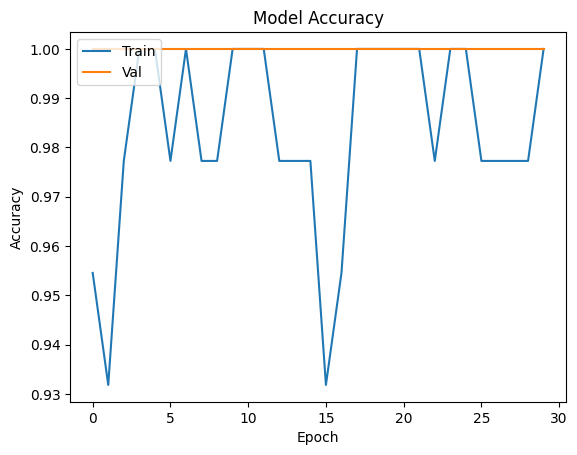

In [ ]:
#Visualize model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

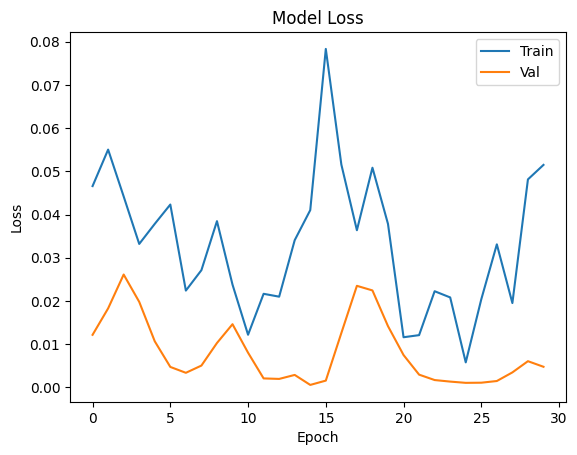

In [ ]:
#Visualize model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
image = load_img('/content/ArecanutFruit/Healthy_Nut/healthy_nut (15).jpg', target_size=(64, 64))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image)
print("Infected" if prediction > 0.5 else "Healthy")

Healthy


In [ ]:
image = load_img('/content/ArecanutFruit/Mahali_Koleroga/diseases_nut (1).jpg', target_size=(64, 64))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image)
print("Infected" if prediction > 0.5 else "Healthy")

Infected
